In [1]:
# set Tensorflow version
# %tensorflow_version 2.x

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# for confusion matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense
print(tf.test.gpu_device_name())

import os
if 'COLAB_TPU_ADDR' not in os.environ:
    print('Not connected');
else:
    print('Connected')

/device:GPU:0
Not connected


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [0]:
XTrain = np.load('drive/My Drive/classification data/Aug_PCB/s_x_train.npy')
YTrain = np.load('drive/My Drive/classification data/Aug_PCB/s_y_train.npy')

In [0]:
raw_xtrain = np.load('drive/My Drive/classification data/Raw_PCB/s_x_train.npy')
raw_ytrain = np.load('drive/My Drive/classification data/Raw_PCB/s_y_train.npy')

In [0]:
bal_xtrain = np.load('drive/My Drive/classification data/Balanced_PCB/xtrain.npy')
bal_ytrain = np.load('drive/My Drive/classification data/Balanced_PCB/ytrain.npy')

In [0]:
raw_xtrain = raw_xtrain/255

In [0]:
bal_xtrain = bal_xtrain/255

In [10]:
raw_ytrain.astype(int)

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
bal_ytrain.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
# r, g, b = np.split(XTrain, 3, 3)
# XTrainGray = r * 0.21 + g * 0.72 + b * 0.07
# XTrainGray = np.reshape(XTrainGray, (298, 300, 300))
# XTrain.shape[0] EDIT

In [0]:
XTrain, XTest, YTrain, YTest = train_test_split(XTrain, YTrain, test_size=0.1)
# print(XTrain.shape) EDIT
# print(YTrain.shape) EDIT
# print(XTest.shape) EDIT
# print(YTest.shape) EDIT

In [14]:
YTrain.astype(int)
YTest.astype(int)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:

# import matplotlib.pyplot as plt
# %matplotlib inline
# for i in range(1):
#     print(XTrainGray[i][100][100])
#     plt.figure()
#     plt.imshow(XTrainGray[i], cmap='gray', vmin=0, vmax=255)

# # for i in range(1):
# #     print(XTrainGray[i][100][100])
#     plt.figure()
#     plt.imshow(XTrainGray[], cmap='gray', vmin=0, vmax=255)

In [16]:
# TensorFlow and tf.keras
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.26.0

print('Installing TensorFlow')
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

print('TensorFlow version: {}'.format(tf.__version__))

Installing dependencies for Colab environment
Installing TensorFlow
TensorFlow version: 2.2.0-rc2


In [33]:
# vgg16_model = keras.applications.vgg16.VGG16(input_shape=(300, 300, 3), include_top=False)
# vgg16_model.summary()

model = keras.Sequential([
keras.layers.Conv2D(20, (5,5), input_shape=(300,300,3), activation='relu', padding='same'),
keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
keras.layers.Conv2D(50, (5,5), activation='relu', padding='same'),
keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
keras.layers.Flatten(),
keras.layers.Dense(300, activation='relu'),
keras.layers.Dense(2, activation='softmax')
])

model.summary()
 
testing=False

# model.summary() EDIT

# compile model EDIT
# opt = SGD(lr=0.001, momentum=0.9) EDIT
# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) EDIT

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(XTrain, YTrain, batch_size=10, epochs=20)

test_loss, test_acc = model.evaluate(XTest, YTest)
print('\nTest accuracy: {}'.format(test_acc))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 300, 300, 20)      1520      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 150, 150, 20)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 50)      25050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 281250)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               84375300  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [0]:
# prediction = model.predict(XTest) EDIT

In [0]:
# for i in range(23): EDIT
#     print(prediction[i]) EDIT

In [0]:
rounded_prediction = model.predict_classes(XTest, verbose=0)

In [0]:
# for i in range(23):  EDIT
#     print(rounded_prediction[i]) EDIT


In [0]:
# list(rounded_prediction[-23:]) EDIT

In [0]:
# print(YTest[0]) EDIT

In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
cm = confusion_matrix(YTest, rounded_prediction)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[239   3]
 [ 18 244]]


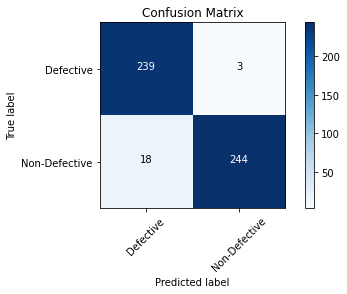

In [42]:
cm_plot_labels = ["Defective", "Non-Defective"]
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")

In [0]:
raw_rounded_prediction = model.predict_classes(raw_xtrain, verbose=0)

Confusion matrix, without normalization
[[ 144    5]
 [  22 2498]]


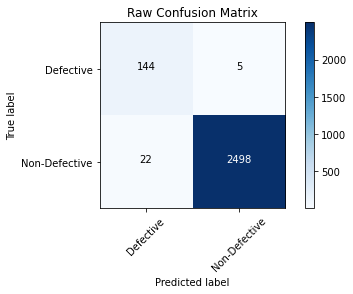

In [44]:
raw_cm = confusion_matrix(raw_ytrain, raw_rounded_prediction)
raw_cm_plot_labels = ["Defective", "Non-Defective"]
plot_confusion_matrix(raw_cm, raw_cm_plot_labels, title="Raw Confusion Matrix")

In [45]:
test_loss, test_acc = model.evaluate(raw_xtrain, raw_ytrain)
print('\nTest accuracy: {}'.format(test_acc))

84/84 [==============================] - 6s 68ms/step - loss: 0.1248 - accuracy: 0.9899

Test accuracy: 0.9898838400840759


In [0]:
bal_rounded_prediction = model.predict_classes(bal_xtrain, verbose=0)

Confusion matrix, without normalization
[[144   5]
 [  1 148]]


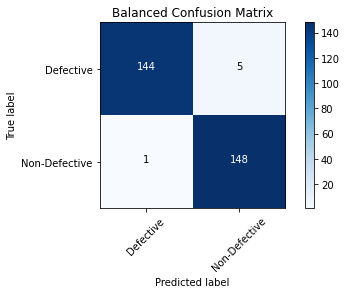

In [47]:
bal_cm = confusion_matrix(bal_ytrain, bal_rounded_prediction)
bal_cm_plot_labels = ["Defective", "Non-Defective"]
plot_confusion_matrix(bal_cm, bal_cm_plot_labels, title="Balanced Confusion Matrix")

In [48]:
test_loss, test_acc = model.evaluate(bal_xtrain, bal_ytrain)
print('\nTest accuracy: {}'.format(test_acc))

10/10 [==============================] - 1s 57ms/step - loss: 0.2558 - accuracy: 0.9799

Test accuracy: 0.9798657894134521
